In [12]:
import sys
sys.path.insert(0, '/Users/xrubiato/DHLab/Draining-Youtube')
%load_ext autoreload
%autoreload 2
from functions import *
import matplotlib.pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from functions import bin_matches_to_adja_mat, split_triangles, move_triangles, pth_vid, pth_frms

In [14]:
PLYLST = ''
V_ID = 'PqyPW-Bdd4E'

pth_v = pth_vid(V_ID, PLYLST)

### Perform first steps of iter0

In [22]:
width = 1920
frames = pth_frms(v_id=V_ID, plylst=PLYLST)
iter0 = pth_iter0(v_id=V_ID)
feats_iter0 = pth_iter0_feats(v_id=V_ID)

In [18]:
openmvg_list(width, frames, iter0)

In [20]:
sfm = pth_sfm(iter0)

In [21]:
sfm

'/Users/xrubiato/DHLab/Draining-Youtube/videos/PqyPW-Bdd4E/iter0/sfm_data.json'

In [23]:
# Comptute features 
openmvg_features(pth_sfm=sfm, pth_features=feats_iter0, force=True)

In [24]:
# Compute Matches 
openmvg_matches(pth_sfm=sfm, pth_matches=feats_iter0, video_mode=None, force=True)




In [25]:
# Get match matrix 
pth_matches = os.path.join(feats_iter0, 'matches.f.txt')
match_matrix = bin_matches_to_adja_mat(path_mtchs=pth_matches, path_frames=frames)

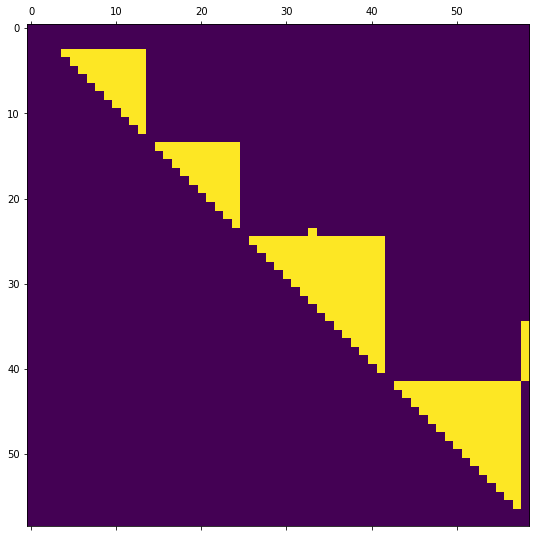

In [66]:
plt.matshow(match_matrix)

In [ ]:
fig = plt.gcf()

In [67]:
fig.figsize=(10,10)

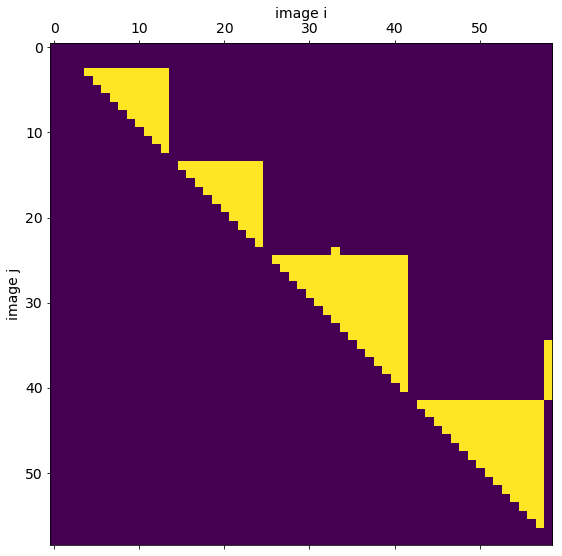

In [68]:
fig

In [41]:
ax = fig.get_axes()

In [77]:
ax[0].set_xlabel('image i', fontsize=30)
ax[0].set_ylabel('image j', fontsize=30)
#ax[0].set_xticks(fontsize=14)

ax[0].tick_params(labelsize=25)
ax[0].xaxis.set_label_position('top') 

In [78]:
fig.savefig(fname='/Users/xrubiato/Desktop/Adjancency_big.eps',format='eps',dpi=200)

In [79]:
!pwd


/Users/xrubiato/DHLab/Draining-Youtube/Notebooks


In [80]:
mat_dash_cam  = bin_matches_to_adja_mat('/Users/xrubiato/Desktop/matches.f.txt')

TypeError: bin_matches_to_adja_mat() missing 1 required positional argument: 'path_frames'

In [82]:
n = 720

In [92]:
def s_line_to_tuple(line):
    """Used to read matches.f.txt file in extract_matches"""

    return (int(line.split(sep=' ', maxsplit=1)[0]),
            int(line.split(sep=' ', maxsplit=1)[1]))


def s_extract_matches(path_mtchs):
    """function to read the matches.f.txt file to extract the matches.
       Return: match_list"""

    # Open and read matches file
    f = open(path_mtchs, mode='r')
    string_file = f.read()

    # Convert to list of lines
    lines = string_file.split(sep='\n')

    nbr_lines = len(lines)
    match_list = list()
    reach_end = False
    i = 0

    while not reach_end:
        match_list.append(line_to_tuple(lines[i]))
        i = i + 2 + int(lines[i + 1])
        if i + 1 == nbr_lines: reach_end = True

    return match_list


def s_make_adj_mat(match_list):
    """Function to recreate an adjacency matrix out of
       the match_list passed as argument."""

    # retrieve size of matrix
    global n 

    # initialize matrix
    adj_mat = np.zeros((n, n))

    idx = np.asarray(match_list)

    # slice the matrix with correct idxs
    adj_mat[idx[:, 0], idx[:, 1]] = 1

    return adj_mat


def s_bin_matches_to_adja_mat(path_mtchs):
    """Returns adjacency matrix provided the path to the matches
       file and the path to the frames folder.
       Fucntion used in iter0."""

    return make_adj_mat(extract_matches(path_mtchs))

In [93]:
mat_dash_cam  = s_bin_matches_to_adja_mat('/Users/xrubiato/Desktop/matches.f.txt')

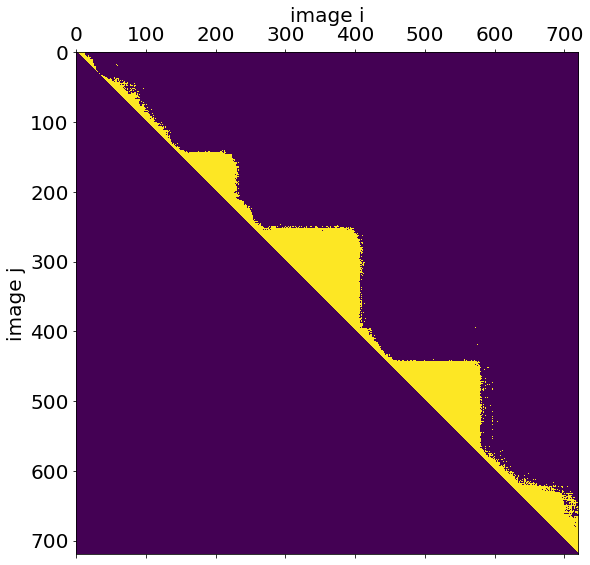

In [97]:
plt.matshow(mat_dash_cam)
fig = plt.gcf()
ax = fig.get_axes()
ax[0].set_xlabel('image i', fontsize=20)
ax[0].set_ylabel('image j', fontsize=20)
#ax[0].set_xticks(fontsize=14)

ax[0].tick_params(labelsize=20)
ax[0].xaxis.set_label_position('top')

In [99]:
fig.savefig(fname='/Users/xrubiato/Desktop/dash_Adjancency_big.eps',format='eps',dpi=200)